# Scottish Tourism Data

First we need to load the dataset with the usual Python commands.

In [1]:
import pandas as pd
import matplotlib.pyplot as pyplot

df = pd.read_csv('data/tourism.csv')

# Why is this data interesting?

It's official information about tourism activities in Scotland over the past few years. Students should be able to relate to this data set - they probably form part of it. Activities are classified into different groups. Annual statistics are provided for each group.

# Questions we might want to ask

1. Which activities are becoming more popular over time? (This involves looking at trends in time series data).
2. Which activities show spikes in certain years? (e.g. sport in 2014?)
3. Which are the top three activities this year? Does this change over time?

# Initial data exploration

Now we have loaded the dataframe into a variable called `df` we can look at the column labels, to try and understand what information is captured in this dataset.

In [2]:
print(df.columns.values)


['FeatureCode' 'DateCode' 'Measurement' 'Units' 'Value' 'Tourism Activity'
 'Breakdown of Domestic Tourism']


This doesn't give us very much help --- it would be better to see a few sample rows of data. Use the `head()` function to examine the first few rows.

In [3]:
df.head()

,FeatureCode,DateCode,Measurement,Units,Value,Tourism Activity,Breakdown of Domestic Tourism
0,S92000003,2016,Count,million pounds (GBP),69,"Day out to a beauty/health centre/spa, etc.",Expenditure
1,S92000003,2014,Count,Million Visits,2,"Day out to a beauty/health centre/spa, etc.",Visits
2,S92000003,2014,Count,million pounds (GBP),71,"Day out to a beauty/health centre/spa, etc.",Expenditure
3,S92000003,2016,Count,Million Visits,2,"Day out to a beauty/health centre/spa, etc.",Visits
4,S92000003,2013,Count,Million Visits,1,"Day out to a beauty/health centre/spa, etc.",Visits


Now we can see that there are two entries for each year, for the "Day out to a beauty/health/centre/spa etc". One entry records the total money spent, the other entry records the total number of visits.

What other activities do people do, other than going to a spa? We need a list of the unique values in the **Tourism Activity** column. We can use the `unique()` function to compute this. How many different activities are recorded?

In [6]:
print(df['Tourism Activity'].unique())


['Day out to a beauty/health centre/spa, etc.'
 'Leisure activities e.g. hobbies & evening classes'
 'Entertainment - to a cinema, concert or theatre'
 'Visitor attraction e.g. theme park, museum, zoo'
 'Outdoor leisure activities e.g. walking, golf'
 'Special personal events e.g. wedding, graduation'
 'Night out to a bar, pub and/or club'
 'Shopping for items that you do not regularly buy' 'Went out for a meal'
 'Watched live sporting events (not on TV)' 'All'
 'Visited friends or family for leisure'
 'General day out/ to explore an area'
 'Day trips/excursions for other leisure purpose'
 'Special public event e.g. festival, exhibition'
 'Sport participation, e.g. exercise classes, gym']


How many years of data is contained in the dataset? We need to find the _minimum_ and _maximum_ values in the 'DateCode' column.

In [10]:
earliestYear = min(df['DateCode'])
print('The earliest data is from ' + str(earliestYear))

The earliest data is from 2013


# Drilling down in sports data

Now we want to extract the sporting events visits, and see how much money is spent each year. We need to **subset** the dataframe - this is like doing an SQL query on a database to extract the matching data. In pandas, we build a _new_ dataframe that includes only the relevant data.

In [20]:
activity = 'Watched live sporting events (not on TV)'
sports = df[(df['Units']=='million pounds (GBP)') & (df['Tourism Activity']==activity)]
sports.head()

,FeatureCode,DateCode,Measurement,Units,Value,Tourism Activity,Breakdown of Domestic Tourism
73,S92000003,2015,Count,million pounds (GBP),400,Watched live sporting events (not on TV),Expenditure
76,S92000003,2016,Count,million pounds (GBP),469,Watched live sporting events (not on TV),Expenditure
77,S92000003,2013,Count,million pounds (GBP),243,Watched live sporting events (not on TV),Expenditure
79,S92000003,2014,Count,million pounds (GBP),421,Watched live sporting events (not on TV),Expenditure


# Drawing a graph

Now we have this data about sporting events visits, let's draw a graph to show how the money spent varies with time. (This is called a time series analysis.)
We want to create a dataframe with only two columns, the DateCode and the Value.

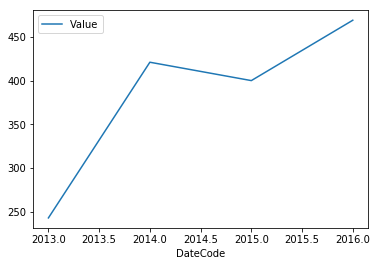

In [30]:
sp2 = sports.sort_values(by=['DateCode'])
sp2.head()
sp2.plot(x='DateCode', y='Value')

**Question**: Why do you think there might be a spike in sporting expenditure in 2014?

# More ideas for investigation

* We could divide the amount of money spent by the number of visits, for each activity in each year. This would allow us to see which activities are most expensive.

* We could subset the frames by year, then sort each year frame by the number of visits. This would allow us to see which activities are the most popular in each year.

* We could check whether increased sport watching leads to increased sports participation. Is there a _correlation_ between these two activities?